## <font color='darkblue'>The Importance of Exploratory Data Analysis (EDA)</font>
([article source](https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/)) <font size='3ptx'><b>There are no shortcuts in a machine learning project lifecycle. We can’t simply skip to the model building stage after gathering the data. We need to plan our approach in a structured manner and the exploratory data analytics (EDA) stage plays a huge part in that.</b></font>

I can say this with the benefit of hindsight having personally gone through this situation plenty of times.

In my early days in this field, I couldn’t wait to dive into machine learning algorithms but that often left my end result hanging in the balance. I discovered, through personal experience and the advice of my mentors, the importance of spending time exploring and understanding my data.

I found this to be true even for text data in <b><a href='https://www.analyticsvidhya.com/blog/category/nlp/'>Natural Language Processing (NLP) projects</a></b>. We need to perform investigative and detective analysis of our data to see if we can unearth any insights. Trust me, you will appreciate the EDA stage the more you work on text data.

And there’s no shortage of text data, is there? We have data being generated from tweets, digital media platforms, blogs, and a whole host of other sources. As a data scientist and an NLP enthusiast, it’s important to analyze all this text data to help your organization make data-driven decisions.

<b>And exploratory data analysis ties all of this together. I would venture to say it’s a critical cog in your NLP project – a stage you simply cannot afford to skip. Exploratory Data Analysis is the process of exploring data, generating insights, testing hypotheses, checking assumptions and revealing underlying hidden patterns in the data.</b>

Therefore, in this article, we will discuss how to perform exploratory data analysis on text data using Python through a real-world example.

### <font color='darkgreen'>Table of Contents</font>
* <font size='3ptx'><b><a href='#sect1'>Understanding the Problem Statement</a></b></font>
* <font size='3ptx'><b><a href='#sect2'>Basic Text Data Pre-processing</a></b></font>
* <font size='3ptx'><b><a href='#sect3'>Cleaning Text Data</a></b></font>
* <font size='3ptx'><b><a href='#sect4'>Preparing Data for Exploratory Data Analysis (EDA)</a></b></font>
* <font size='3ptx'><b><a href='#sect5'>Exploratory Data Analysis of Text Data (Amazon’s Products)</a></b></font>

<a id='sect1'></a>
## <font color='darkblue'>Understanding the Problem Statement</font>
<font size='3ptx'><b>The first step in any machine learning project is understanding the problem. So that’s what we’ll aim to do here.</b></font>

I’m a big fan of Amazon’s product lineup. Here, I have taken a dataset containing reviews of various products manufactured by Amazon, like Kindle, Fire TV, Echo, etc. You can download the dataset <a href='https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products'>here</a>.

The dataset has about 34,000+ rows, each containing review text, username, product name, rating, and other information for each product. <b>Our objective is to use this data, explore it, and generate insights from it.</b>

Let’s get the ball rolling and explore this dataset using different techniques and generate insights from it.

<a id='sect2'></a>
## <font color='darkblue'>Basic Text Data Pre-processing</font>
<font size='3ptx'><b>Before jumping to the exploration stage, we need to perform basic data pre-processing steps like null value imputation and removal of unwanted data.</b></font>

So, let’s start by importing libraries and reading our dataset:

In [24]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)

In [2]:
# Importing dataset
df=pd.read_csv('../../datas/kaggle_consumer_reviews_of_amazon_products/dataset.csv')
df.shape

c:\users\john\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(34660, 21)

<b>The dataset contains 34,660 rows and 21 columns</b>. But we only need information such as product name, review text, user recommendation (binary), and the number of people that found a review helpful. Therefore, <b>I am dropping other columns and reducing the dataset to only four columns, i.e., `name`, `reviews.text`, `reviews.doRecommend`, and `reviews.numHelpful`</b>:

In [3]:
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (34660, 4)


name  \
0  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

                                        reviews.text reviews.doRecommend  \
0  This product so far has not disappointed. My c...                True   
1  great for beginner or experienced person. Boug...                True   
2  Inexpensive tablet for him to use and learn on...                True   
3  I've had my Fire HD 8 two weeks now and I love...                True   
4  I bought this for my grand daughter when she c...                True   

   reviews.numHelpful  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

Let’s see if there are any null values present in our dataset:

In [4]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

There are a few null values in the dataset. So, let’s drop these null values and proceed further:

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

I am only considering those products that have at least 500 reviews. I am doing this to make sure that I have a sufficient number of reviews for each product. Here, we will use lambda functions with <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html'>filter()</a> to filter our dataset.

If you want to know more about lambda functions, then you can read this article: <a href='https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/'>What are Lambda Functions?</a> <a href='https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/'>A Quick Guide to Lambda Functions in Python</a>. I highly recommend doing that because I’ll be using lambda functions quite a bit later in this article.

In [6]:
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 8


Now, we are left with eight products. Also,  the `reviews.doRecommend` column contains values in the form of True-False and ` reviews.numHelpful` contains floating-point numbers, which is not possible. Therefore, I am converting these columns into integers:

In [7]:
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

That’s it! We are finished with the basic data-preprocessing part. Let’s move to the next section – cleaning text data.

<a id='sect3'></a>
## <font color='darkblue'>Cleaning Text Data in Python</font>
* <font size='3ptx'><b><a href='#sect3_1'>Expand Contractions</a></b></font>
* <font size='3ptx'><b><a href='#sect3_2'>Lowercase the reviews</a></b></font>
* <font size='3ptx'><b><a href='#sect3_3'>Remove digits and words containing digits</a></b></font>
* <font size='3ptx'><b><a href='#sect3_4'>Remove Punctuations</a></b></font>

<br/>

<font size='3ptx'><b>Generally, text data contains a lot of noise either in the form of symbols or in the form of punctuations and stopwords</b></font>. Therefore, it becomes necessary to clean the text, not just for making it more understandable but also for getting better insights.

<b>In this section, we’ll perform text cleaning on the columns containing textual data.</b> If you want to learn in-depth about text cleaning in Python, you can read this fantastic article: <a href='https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/'>Steps for effective text data cleaning</a> (<a href='https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/'>with a case study using Python</a>). It explains various techniques of text cleaning with implementation in python.

Here, we have four columns in our dataset out of which two columns (`name`, `reviews.text`) contain textual data. So, let’s start with the `name` column first and take a look at the text present in this column:

In [8]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

Take a close look at the title of products. Some product names contain repeating names separated by three consecutive commas (<font color='brown'>,,,</font>). So, let’s clean the name of the products:

In [9]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

Now, it’s time to move on to the second column – `reviews.text`. This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset:

In [10]:
for index,text in enumerate(df['reviews.text'][35:40]):
    print('Review %d:\n'%(index+1), text)

Review 1:
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2:
 Overall a nice product for traveling purposes Value for money
Review 3:
 My children love this table great quality of pictures, excellent camera
Review 4:
 I bought 3 tablets and my family was not disappointed.
Review 5:
 Great tablet fast screen good size never gives me problem


Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:
* Expand contractions
* Lowercase the reviews
* Remove digits and words containing digits
* Remove punctuations

So, let’s start by expanding contractions.

<a id='sect3_1'></a>
### <font color='darkgreen'>Expand Contractions</font>
Contractions are the shortened versions of words like `don’t` for `do not` and `how’ll` for `how will`. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews.

Here, I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms:

In [14]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [18]:
# Test the function for expanding contractions
sample_text = 'I\'d like to test if you\'ll able to know who\'ll find out and it\'d shouldn\'t be wrong'
def replace(match):
    return contractions_dict[match.group(0)]

output_text = contractions_re.sub(replace, sample_text)
print(output_text)

I would like to test if you will able to know who will find out and it would should not be wrong


In [12]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

Here, the expand_contractions function uses regular expressions to map the contractions in the text to their expanded forms from the dictionary. I will be using regular expressions a lot in the upcoming sections. Therefore, I highly recommend you to read the following articles on regular expressions:
* [Beginner’s Tutorial for Regular Expressions in Python](https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/)
* [Extracting information from reports using Regular Expressions Library in Python](https://www.analyticsvidhya.com/blog/2017/03/extracting-information-from-reports-using-regular-expressons-library-in-python/)
* [4 Applications of Regular Expressions that every Data Scientist should know (with Python code)!](https://www.analyticsvidhya.com/blog/2020/01/4-applications-of-regular-expressions-that-every-data-scientist-should-know-with-python-code/)

Now that we have expanded the contractions, it’s time to lowercase the words.

<a id='sect3_2'></a>
### <font color='darkgreen'>Lowercase the reviews</font>
In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the <font color='blue'>lower()</font> function available in Python for converting text to lowercase:

In [13]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

<a id='sect3_3'></a>
### <font color='darkgreen'>Remove digits and words containing digits</font>
Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [34]:
pd_max_colwidth = pd.get_option('display.max_colwidth')
print(pd_max_colwidth)

50


In [36]:
pd.set_option('display.max_colwidth', None)
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['cleaned'].sample(n=5)

10816                                                                                                                                                                                                                         amazon products are always good as expected. and i am totally satisfied with my purchase.
3554                                                                                                                                                                                                                                              my grandson loves it. he said his games do not freeze up on this one.
9157                                                                                                                                                                      we bought this for our teenage grandson, who uses it for games, internet, and friend chat. works great, and the price did not break the bank.
18265                                                           

In [37]:
pd.set_option('display.max_colwidth', pd_max_colwidth)

<a id='sect3_4'></a>
### <font color='darkgreen'>Remove Punctuations</font>
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [38]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [39]:
pd.set_option('display.max_colwidth', None)
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['cleaned'].sample(n=5)

19015    i really like the kindle and appreciate the convenience i use it all the time and especially like that it is backlit so i can read at night without turning on a light the only thing i have not figured out is how to tell which of the downloaded books i have already read my old kindle labeled them clearly but i cannot find it on this new one a small problem that is easily worked around
4612                                                                                                                                                                                                                 i bought this for my son some of his homework needs to be done online and the tablet worked perfectly for it he could also use it at the zoo to take pictures and use it to play games
11986                                                                                                                                                                                                           

Here, <b><a href='https://docs.python.org/3/library/string.html#string.punctuation'>string.punctuation</a></b> constant contains all the punctuations and we use regular expressions to search them in the text and remove them. Finally, we still have some extra spaces present in the data. Let’s remove them:

In [40]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [41]:
for index,text in enumerate(df['cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it
Review 2:
 overall a nice product for traveling purposes value for money
Review 3:
 my children love this table great quality of pictures excellent camera
Review 4:
 i bought tablets and my family was not disappointed
Review 5:
 great tablet fast screen good size never gives me problem


Great! We have cleaned the text data and are just one section away from the EDA stage!

<a id='sect4'></a>
## <font color='darkblue'>Preparing Text Data for Exploratory Data Analysis (EDA)</font>
We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a <b><font color='darkblue'>Document Term Matrix</font></b> that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

<b>A Document Term Matrix provides the frequency of a word in a corpus</b> (<font color='brown'>collection of documents</font>)<b>, which in this case are reviews.</b> It helps in analyzing the occurrence of words in different documents in a corpus. The following figure is an example of a document term matrix:
![1.png](images/1.png)
<br/>

In this section, we’ll do the following things:
* Stopwords Removal
* Lemmatization
* Create Document Term Matrix

<b><a href='https://en.wikipedia.org/wiki/Stop_word'>Stopwords</a> are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document.</b> These values are removed to decrease the dataset size and increase focus on meaningful words.

<b>Lemmatization is a systematic process of reducing a token to its lemma.</b> It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form. You can read more about stopwords removal and lemmatization in this article: <a href='https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/'>NLP Essentials: Removing Stopwords and Performing Text Normalization using NLTK and spaCy in Python</a>.

We’ll use <b><a href='https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/'>SpaCy</a></b> for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [82]:
#!!pip install spacy
#!!python3 -m spacy download en
#!!pip install wordcloud

In [83]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

In [71]:
stemmer = PorterStemmer()
en_stopwords = stopwords.words('english')
sample_text = 'This is a very interesting article. You must read it and have fun.'

def nltk_stemmer_and_remove_stopwords(text):
    words = []
    for sent in sent_tokenize(text):
        for word in word_tokenize(sent):
            word = stemmer.stem(word)
            if word not in en_stopwords:
                words.append(word)
                
    return words

nltk_stemmer_and_remove_stopwords(sample_text)

['thi', 'veri', 'interest', 'articl', '.', 'must', 'read', 'fun', '.']

In [72]:
# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join(nltk_stemmer_and_remove_stopwords(x)))

In [74]:
for index,text in enumerate(df['lemmatized'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 love everyth thi tablet imag sharp clear fast light weight love
Review 2:
 overal nice product travel purpos valu money
Review 3:
 children love thi tabl great qualiti pictur excel camera
Review 4:
 bought tablet famili wa disappoint
Review 5:
 great tablet fast screen good size never give problem


We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products:

In [76]:
pd.set_option('display.max_colwidth', 50)
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

lemmatized
name                                                                                                 
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  thi product far ha disappoint children love us...
Amazon Fire Tv                                      echo learn everyday use daili use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  nice littl set slow wish would investig littl ...
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  best valu money hand work perfectli purchas da...
Echo (White)                                        although thi compet ipad higher end android ta...

It’s time to create a <b><font color='darkblue'>Document Term Matrix</font></b>. You can read more about the document term matrix <a href='https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/'>here</a>.

In [79]:
# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aa  aaa  aamazon  abandon  \
name                                                                            
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...   0    0        0        0   
Amazon Fire Tv                                       0    1        1        0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...   0    0        0        1   

                                                    abatteri  abc  abcmous  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...         0    0        0   
Amazon Fire Tv                                             0    0        0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...         0    2        0   

                                                    abcmousecom  abd  abil  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...            0    0    24   
Amazon Fire Tv                                                0    0    37   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...            0    0    56   

                                                    abilti  abit  abk  abl  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       0     1    0   77   
Amazon Fire Tv                                           0     0    0  121   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...       0     0    0  131   

                                                    abnorm  abod  abook  \
name                                                                      
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       0     0      0   
Amazon Fire Tv                                           0     0      0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...       1     0      1   

                                                    abound  abount  abouti  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       0       1       0   
Amazon Fire Tv                                           0       0       0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...       1       0       0   

                                                    aboutif  abov  abroad  \
name                                                                        
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...        0     4       0   
Amazon Fire Tv                                            0     1       0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...        0     4       0   

                                                    abruptli  absenc  absofb  \
name                                                                           
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...         0       0       0   
Amazon Fire Tv                                             1       1       0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...         0       0       0   

                                                    absoluit  absolut  \
name                                                                    
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...         0       36   
Amazon Fire Tv                                             0       50   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...         0       70   

                                                    absolutli  absorb  abt  \
name                                                                         
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...          0       0    0   
Amazon Fire Tv                                              0       0    0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...          0       0    0   

                                                    abund  abus  ac  academ  \
name                                                                          
All-

Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

<a id='sect5'></a>
## <font color='darkblue'>Exploratory Data Analysis on Amazon Product Reviews using Python</font>
Yes – it’s finally time for Exploratory Data Analysis! It is a crucial part of any data science project because that’s where you get to know more about the data. <font size='3ptx'><b>In this phase, you can reveal hidden patterns in the data and generate insights from it.</b></font>

So, let’s start by looking at the common words present in the reviews for each product. For this, I will use the document term matrix created earlier with word clouds for plotting these words. <b>Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.</b>

Word clouds can be generated using the <b><a href='https://amueller.github.io/word_cloud/index.html'>wordcloud</a></b> library. So, let’s plot word clouds for each product:

In [109]:
#!!pip install textstat

In [110]:
from textblob import TextBlob
import textstat

In [85]:
# Function for generating word clouds
def generate_wordcloud(data, title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

In [86]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

df_dtm.head()

name      All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta  \
aa                                                        0                                         
aaa                                                       0                                         
aamazon                                                   0                                         
abandon                                                   0                                         
abatteri                                                  0                                         

name      Amazon Fire Tv  \
aa                     0   
aaa                    1   
aamazon                1   
abandon                0   
abatteri               0   

name      Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black  \
aa                                                        0                                                        
aaa                                                       0                                                        
aamazon                                                   0                                                        
abandon                                                   1                                                        
abatteri                                                  0                                                        

name      Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue  \
aa                                                        0                        
aaa                                                       0                        
aamazon                                                   0                        
abandon                                                   0                        
abatteri                                                  0                        

name      Echo (White)  \
aa                   0   
aaa                  0   
aamazon              0   
abandon              1   
abatteri             0   

name      Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case  \
aa                                                        1                         
aaa                                                       0                         
aamazon                                                   0                         
abandon                                                   0                         
abatteri                                                  0                         

name      Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta  \
aa                                                        0                        
aaa                                                       0                        
aamazon                                                   0                        
abandon                                                   1                        
abatteri                                                  1                        

name      Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,  
aa                                                        0                                                                                              
aaa                                                       0                                                                                              
aamazon                                                   0                                                                                              
abandon                                                   0                                                                                              
abatteri                                                  0

In [90]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

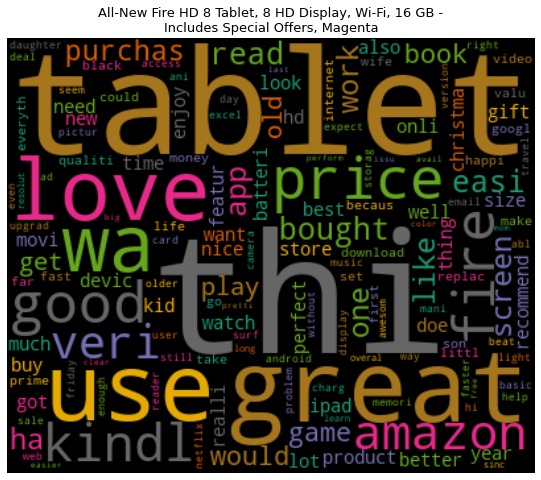

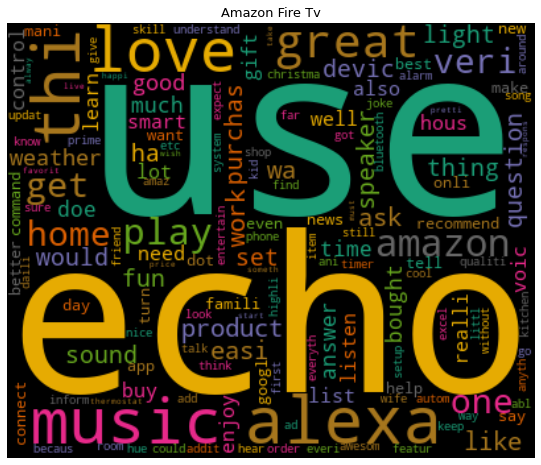

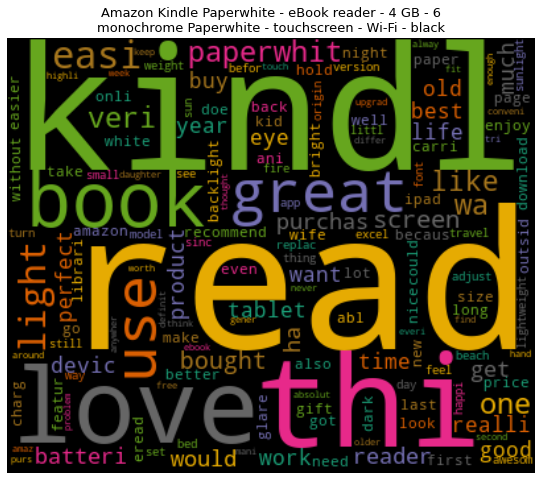

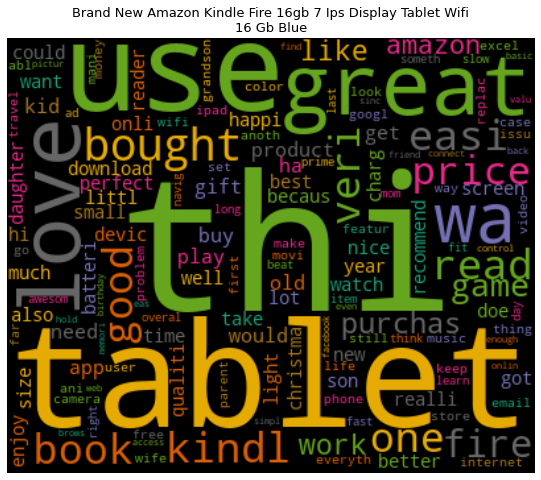

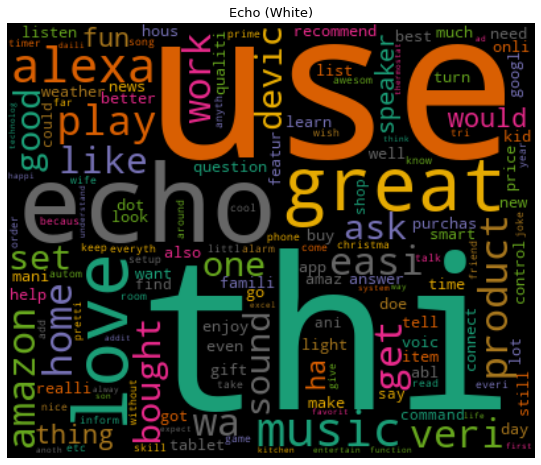

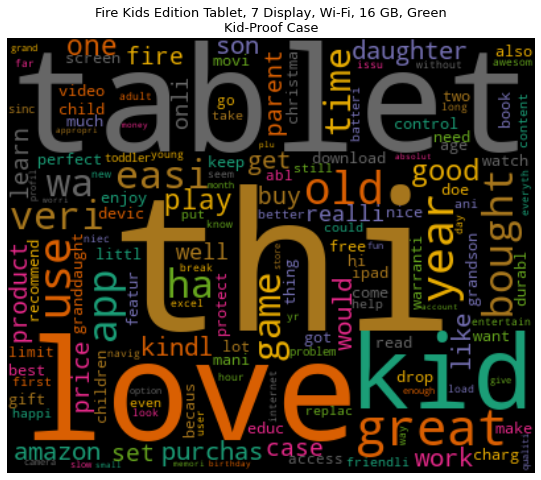

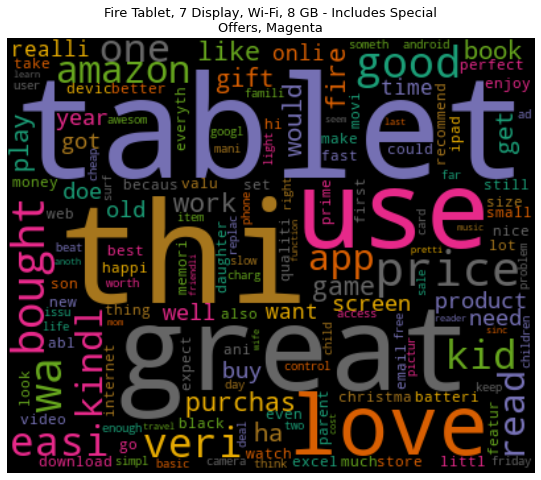

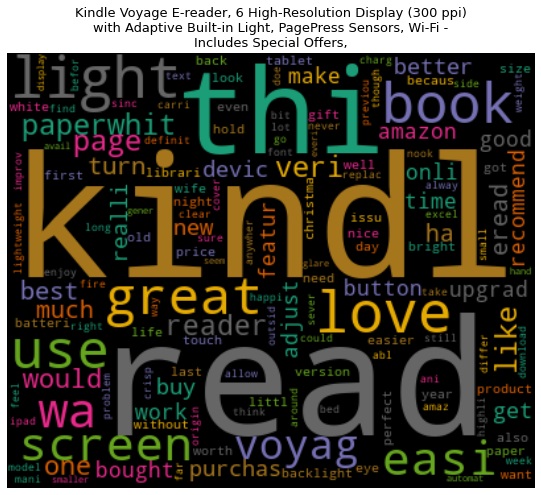

In [91]:
# Plotting word cloud for each product
for index, product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False), product)

<b>Here, we can see that LOVE, USE, BUY, GREAT, and EASY are the most frequently occurring words for almost every product</b>. This means that users are loving products from Amazon and found purchasing them a great decision. They also found them easy to use.

That’s a quick way to generate insights from text data, isn’t it?

Now, let’s say Amazon wants to dig deeper into this and wants to know which products they should improve. We can find the answer to this question by doing a sentiment analysis of the reviews for each product. Sentiment analysis is the analysis of how much a piece of text is positive and opinionated. If you want to know more about sentiment analysis, here you go: <a href='https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/'>Comprehensive Hands-on Guide to Twitter Sentiment Analysis with dataset and code.</a>

Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the <b><a href='https://textblob.readthedocs.io/en/dev/'>TextBlob</a></b> library in Python:

In [98]:
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [101]:
pd.set_option('display.max_colwidth', 150)
df[['polarity', 'lemmatized']].sample(n=10)

polarity  \
25211  0.800000   
9172   0.500000   
5198   0.560000   
10782  0.300000   
16695  0.300000   
16478  0.228030   
22340  0.368182   
22783  0.111111   
23065  0.136364   
16181  0.300000   

                                                                                                                                                  lemmatized  
25211                                                                                      great tool home offic would highli recommend anyon simpl easi use  
9172                                                                                                      bought thi grandma could use church read bibl love  
5198   thi wa purchas daughter absolut love thi tablet perfect size ha stop use sinc gave excel product keep busi entertain graphic awesom price paid wa ...  
10782                                                                                                                            son enjoy much happi tablet  
16695                                                                                                               great nonexpens item kid us destroy ipad  
16478  thi perfect young children come readi use straight box case veri well built protect tablet devic actual pretti light easi hold onc sign parent acc...  
22340                                                   alexa handi lot smarter thought would also see use homework answer formula stop nice addit live room  
22783                                                                want echo quit awhil went half price could resist sync right smart product without issu  
23065                                                    wife get chanc explor capabl thi devic impress realli appreci email everi often inform us new thing  
16181                                                                                                              glad get control time spent sure site app

Let’s take a look at some of the most positive and negative reviews from the customers:

In [102]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 This is the best value for bucks tablet out there in market and that too with awesome Amazon brand value.
Review 2:
 This was the perfect gift for my Neice and nephew I bought two
Review 3:
 This is the best tablet to get for the amount of money you will spend. It has everything you need. Maybe not the best camera but I phone for that.


In [103]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
    print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 One of the worst purchases or investments you could make for technology.
Review 2:
 the only downside of it is that you cannot have google playstore on this tablet but you can still install it manually since they both based on android os
Review 3:
 I hate it, there is not any organization for the apps


Let’s plot polarities of reviews for each product and compare them. A bar graph is best suited for this purpose:

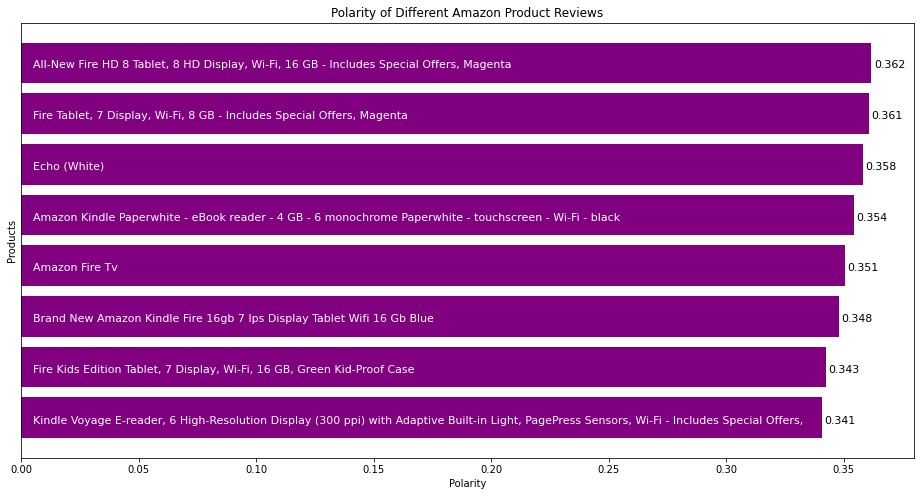

In [104]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)), product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar, product in zip(polarity_graph, product_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar, polarity in zip(polarity_graph, product_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

You can see that according to the polarity of reviews, Amazon needs to improve `Fire Kids Edition Tablet` and `Kindle Voyage E-reader`. Let’s also take a look at the number of reviewers who recommended a particular product. For this, we can take the percentage of reviewers and plot that:

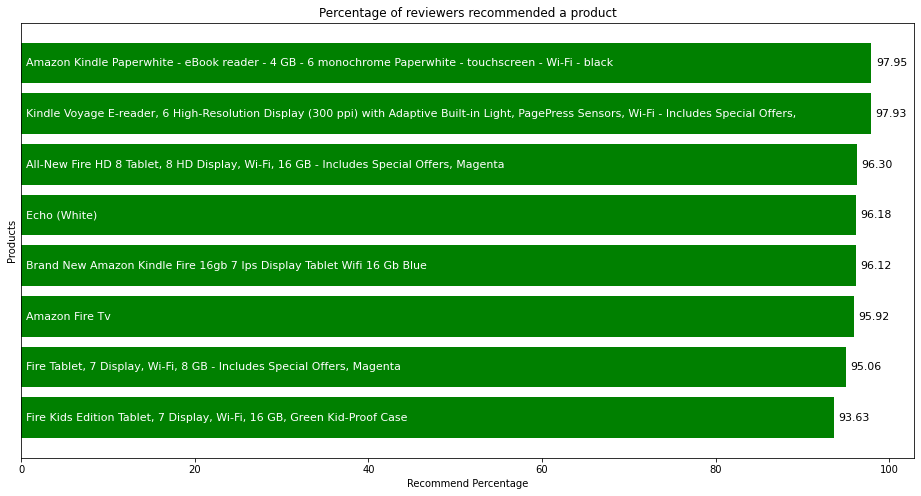

In [105]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(
    np.arange(len(recommend_percentage.index)),
    recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar, product in zip(recommend_graph, recommend_percentage.index):
    plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar, percentage in zip(recommend_graph, recommend_percentage['reviews.doRecommend']):
    plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

Here, we can see that the `Fire Kids Edition Tablet` has the lowest recommendation percentage. It’s reviews also have the lowest polarity. So, we can say that <b>the polarity of reviews affects the chances of a product getting recommended</b>.

Another thing that we can look at is the readability of reviews upvoted as helpful by others. The readability of a text document can be checked using various readability indices like <b><a href='https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests'>Flesch Reading Ease</a></b>, <b><a href='https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula'>Dale Chall Readability Score</a></b>, and <b><a href='https://en.wikipedia.org/wiki/Gunning_fog_index'>Gunning Fog Index</a></b>.

For this, we can use the <b><a href='https://pypi.org/project/textstat/'>textstat</a></b> library in Python. <b>Textstat is typically used for determining readability, complexity, and grade level of a particular corpus</b>. Each of these indices works on a different methodology for determining the readability level of a document.

In [111]:
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvoted reviews=> 7.7211788617886175
Dale Chall Score of not upvoted reviews=> 7.501252192632754
Flesch Reading Score of upvoted reviews=> 81.98257113821138
Flesch Reading Score of not upvoted reviews=> 84.85865810875458
Gunning Fog Index of upvoted reviews=> 7.980264227642277
Gunning Fog Index of not upvoted reviews=> 6.861778424493702


There is very little difference in the Dale Chall Score and the Flesch Reading Score for helpful and not helpful reviews. But there is a considerable amount of variation in the Gunning Fog Index.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the <font color='blue'>text_standard()</font> function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely.

In [112]:
df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


Interesting. <b>Both upvoted and not upvoted reviews are easily understandable by anyone who has completed the 5th or 6th grade in school.</b>

Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the <font color='blue'>reading_time()</font> function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [113]:
df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews=> 3.4542174796747966
Reading Time of not upvoted reviews=> 1.7917397544251314


Surprisingly, the reading time of upvoted reviews is twice that of not upvoted reviews. It means that people usually find <b>longer reviews helpful</b>.

## <font color='darkblue'>What’s the Conclusion from the EDA on Text Data?</font>
Let’s take a look at the inferences drawn from the above analysis:

1. Customers love products from Amazon. They find them a great purchase and easy to use
2. Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product
3. The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school
4. The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful